## Introduction to Decision Trees

Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. They are one of the most popular and easy-to-understand machine learning algorithms, providing the basis for more complex methods like Random Forests and Gradient Boosting Machines.

### What are Decision Trees?

Decision Trees model decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It's a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent decision rules, and each leaf node represents the outcome.

## How Do Decision Trees Work?

The core algorithm for building decision trees called the Classification and Regression Tree (CART) algorithm involves the following steps:
1. **Select the Best Attribute**: Use a criterion like Gini impurity or information gain to select the attribute that best splits the dataset.
2. **Split the Data**: Based on the selected attribute, split the data into subsets that contain instances with similar values.
3. **Repeat**: Repeat the process recursively for each child until one of the conditions for stopping is met. This can be defined by the maximum depth of the tree, minimum samples at a leaf node, or a condition where all leaves are pure.
4. **Tree Pruning**: Optionally, simplify the tree to avoid overfitting by removing sections of the tree that provide little power to classify instances.

### Benefits of Decision Trees

- **Interpretability**: They are simple to understand and interpret, making them valuable for decision-making tasks.
- **Handling both numerical and categorical data**: Trees can handle various data types and differentiate between them automatically.
- **No need for data pre-processing**: Often, no data normalization or dummy variables are required.

### Decision Tree Implementation

In the following sections, we'll implement a Decision Tree using Python's scikit-learn library, demonstrating its application on a dataset.

Here is a visual representation of a simple Decision Tree:

![Decision Tree Example](Decision-Tree.png)

This image is taken from this [article.](https://www.ibm.com/topics/decision-trees)


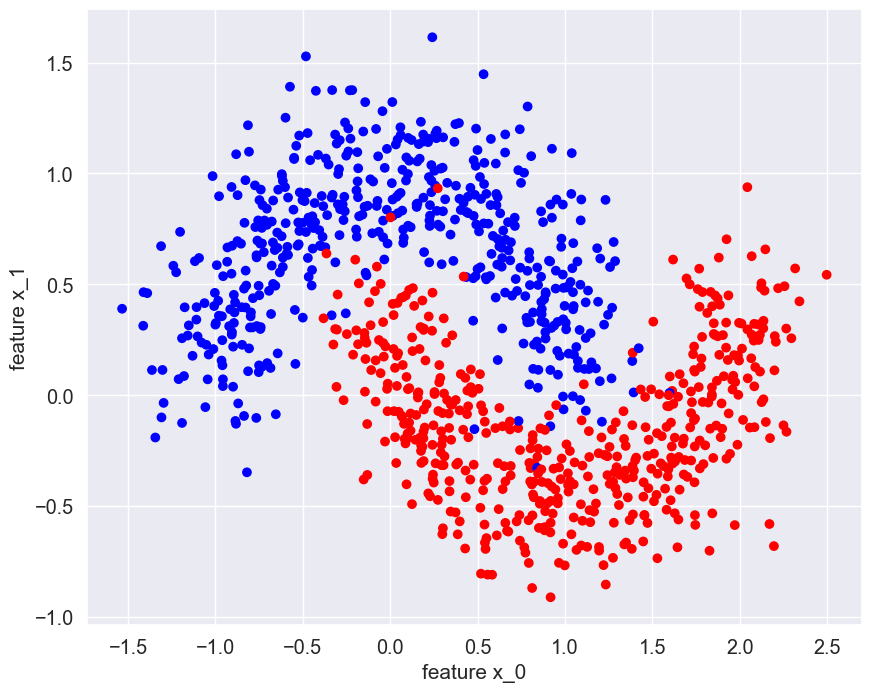

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

X, y = make_moons(n_samples = 1_000, noise = 0.20, random_state = 3)
colors = ["red" if label == 1 else "blue" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

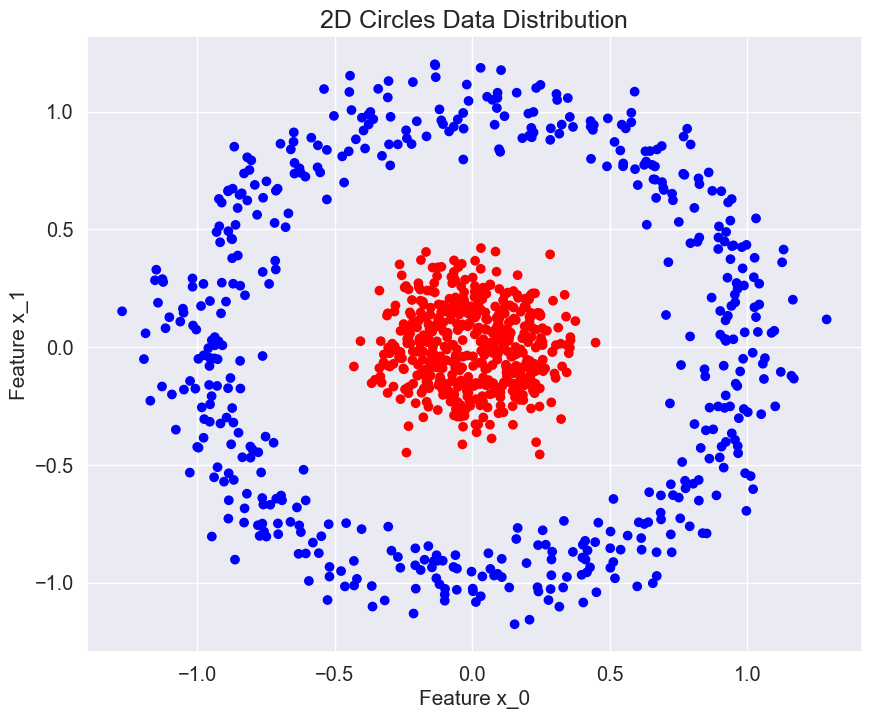

In [117]:
# Generating the artificial data with make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=3)
colors = ["red" if label == 1 else "blue" for label in y]

# Plotting the data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Feature x_0", fontsize=15)
plt.ylabel("Feature x_1", fontsize=15)
plt.title("2D Circles Data Distribution", fontsize=18)
plt.grid(True)
plt.show()

## Combining Datasets for a More Complex Classification Task

In our exploration of Decision Trees, we have so far worked with relatively simple datasets. However, real-world data often presents more complexity. To simulate a more challenging scenario, we will combine two different datasets - `make_moons` and `make_circles` from scikit-learn. This combination will create a dataset with four distinct classes, adding complexity and allowing us to observe how well Decision Trees can adapt to more intricate data structures.

### Creating the Combined Dataset

We start by generating two separate datasets: one using the `make_moons` function and the other using `make_circles`. To ensure these datasets can be distinguished when combined, we offset the `make_circles` data slightly in the feature space. Then, we vertically stack the features (`X`) and horizontally stack the labels (`y`), ensuring that the labels for the `make_circles` data are distinct from those of `make_moons`.


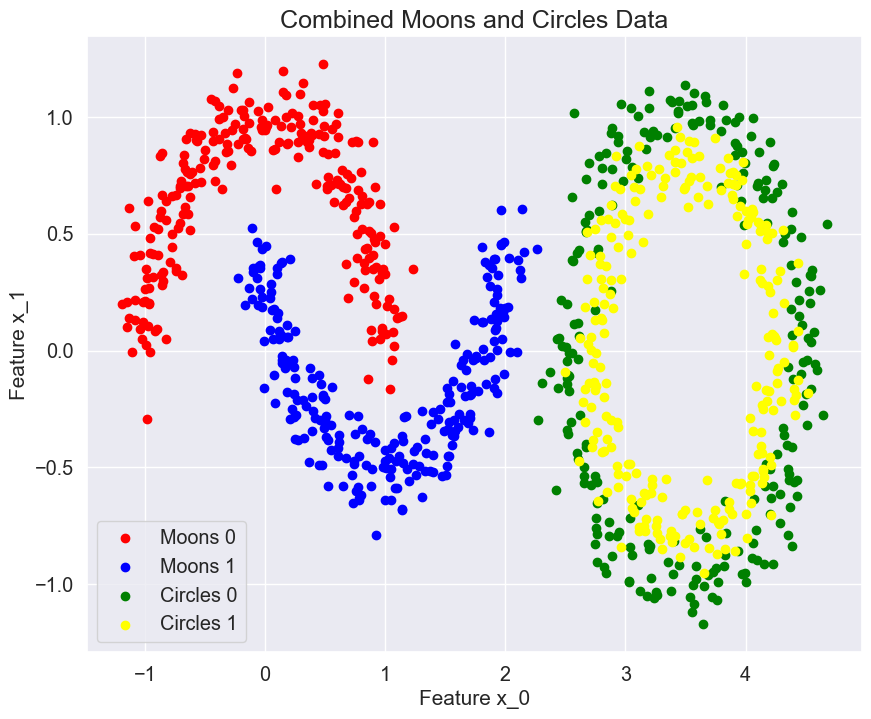

In [118]:
# Generate make_moons and make_circles data
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=3)
X_circles, y_circles = make_circles(n_samples=500, noise=0.1, random_state=3)

# Offset the circles dataset for better visualization
X_circles[:, 0] += 3.5  # Adjusting x coordinate

# Combine the datasets
X_combined = np.vstack([X_moons, X_circles])
y_combined = np.hstack([y_moons, y_circles + 2])  # Adding 2 to make the labels distinct

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X_combined[y_combined == 0, 0], X_combined[y_combined == 0, 1], color='red', label='Moons 0')
plt.scatter(X_combined[y_combined == 1, 0], X_combined[y_combined == 1, 1], color='blue', label='Moons 1')
plt.scatter(X_combined[y_combined == 2, 0], X_combined[y_combined == 2, 1], color='green', label='Circles 0')
plt.scatter(X_combined[y_combined == 3, 0], X_combined[y_combined == 3, 1], color='yellow', label='Circles 1')
plt.xlabel('Feature x_0', fontsize=15)
plt.ylabel('Feature x_1', fontsize=15)
plt.title('Combined Moons and Circles Data', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()


## Data Splitting: Training and Test Sets

Given the complexity of our combined dataset, which is clearly not linearly separable, we proceed to split the data into training and test sets. This is a crucial step in machine learning to ensure that our model is tested on unseen data, providing a fair assessment of its generalization capabilities.

### Splitting the Dataset

The dataset is split into a training set and a test set, with the test set comprising 40% of the total data. This split provides a substantial amount of data for both training the model and evaluating its performance.

### Visualizing the Training Data

After splitting, it's insightful to visualize the training data. This visualization helps us understand the distribution and the complexity of the training set that our Decision Tree model will learn from. The colors in the plot represent the four distinct classes, making it easier to observe how they are spread and intermingled in the feature space.

The resulting plot of the training data offers a glimpse into the challenges that our Decision Tree will face, highlighting the non-linearity and overlap among different classes.


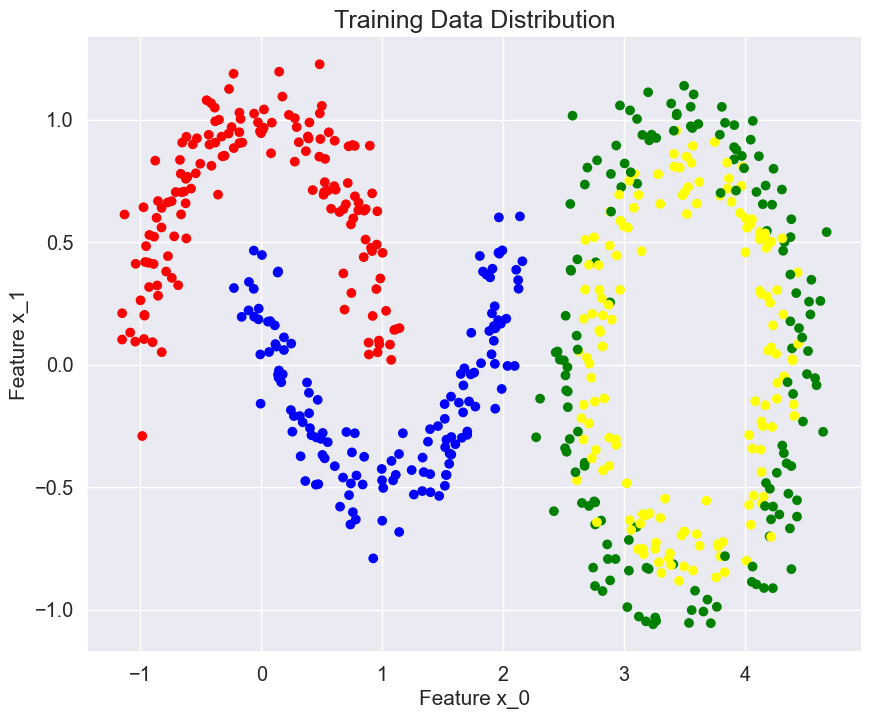

In [119]:
# Assuming X and y are your combined dataset features and labels
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.4, random_state=42)

# Define a color for each of the four classes
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}

# Map the colors to your labels for both training and test sets
c_train = [colors[label] for label in y_train]
c_test = [colors[label] for label in y_test]

# Plotting the training data
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("Feature x_0", fontsize=15)
plt.ylabel("Feature x_1", fontsize=15)
plt.title("Training Data Distribution", fontsize=18)
plt.grid(True)
plt.show()


## Decision Tree with Limited Depth

We begin our exploration with a Decision Tree Classifier set to a `max_depth` of 1. This limited depth means the tree can only make a single split, leading to a very basic model.

### Observing a Shallow Tree
With `max_depth` set to 1, the Decision Tree is too simplistic for our complex dataset. This is evident in both the text representation of the tree rules and its visual plot. Such a shallow tree is inadequate for distinguishing between the four classes, as it can only create two decision regions.

The visualization below demonstrates the limitations of this approach. A minimum max_depth of 2 is needed for our data.

|--- x_0 <= 2.22
|   |--- class: 0
|--- x_0 >  2.22
|   |--- class: 2
 



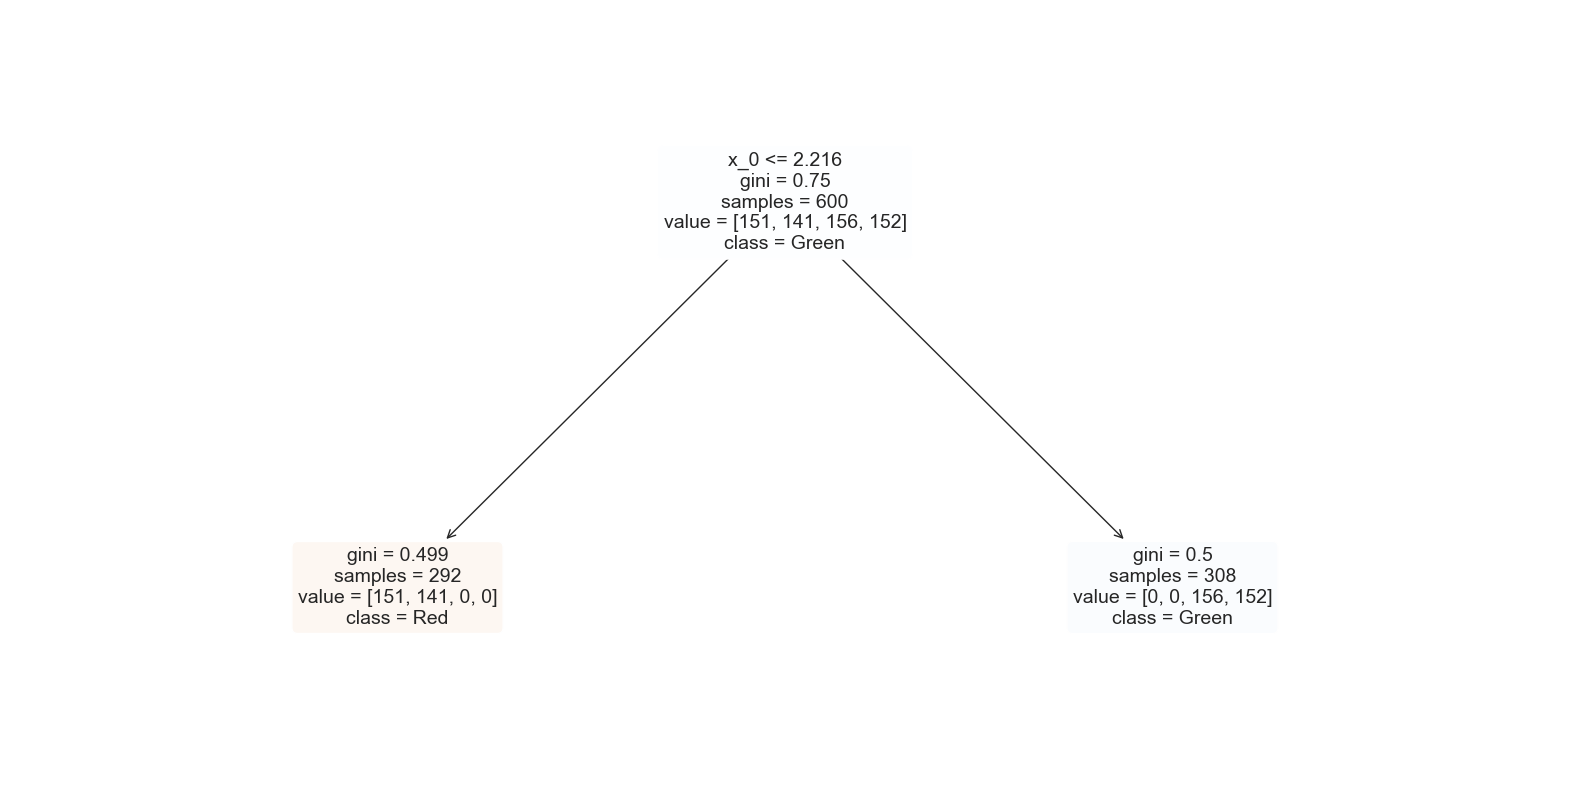

In [120]:

decision_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
decision_tree.fit(X_train, y_train)

# Exporting the decision tree rules to text
tree_rules = export_text(decision_tree, feature_names=["x_0", "x_1"])
print(tree_rules, "\n")

# Plotting the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
a = plot_tree(decision_tree,
              feature_names=["x_0", "x_1"],
              class_names=["Red", "Blue", "Green", "Yellow"],  # Class names as colors
              rounded=True,
              filled=True, 
              fontsize=14)
plt.show()


The Tree only shows 2 possible outcomes which means 2 classes are left out. Let's try this again with a max_depth of 6.

In [121]:
decision_tree = DecisionTreeClassifier(max_depth=6, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

|--- x_0 <= 2.22
|   |--- x_1 <= 0.47
|   |   |--- x_0 <= -0.46
|   |   |   |--- class: 0
|   |   |--- x_0 >  -0.46
|   |   |   |--- x_1 <= 0.01
|   |   |   |   |--- class: 1
|   |   |   |--- x_1 >  0.01
|   |   |   |   |--- x_0 <= 1.44
|   |   |   |   |   |--- x_0 <= 0.46
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_0 >  0.46
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  1.44
|   |   |   |   |   |--- class: 1
|   |--- x_1 >  0.47
|   |   |--- x_0 <= 1.46
|   |   |   |--- class: 0
|   |   |--- x_0 >  1.46
|   |   |   |--- class: 1
|--- x_0 >  2.22
|   |--- x_0 <= 2.62
|   |   |--- x_1 <= -0.46
|   |   |   |--- x_1 <= -0.54
|   |   |   |   |--- class: 2
|   |   |   |--- x_1 >  -0.54
|   |   |   |   |--- class: 3
|   |   |--- x_1 >  -0.46
|   |   |   |--- class: 2
|   |--- x_0 >  2.62
|   |   |--- x_1 <= 0.91
|   |   |   |--- x_0 <= 4.28
|   |   |   |   |--- x_1 <= -0.88
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- x_1 >  -0.88
|   |   | 

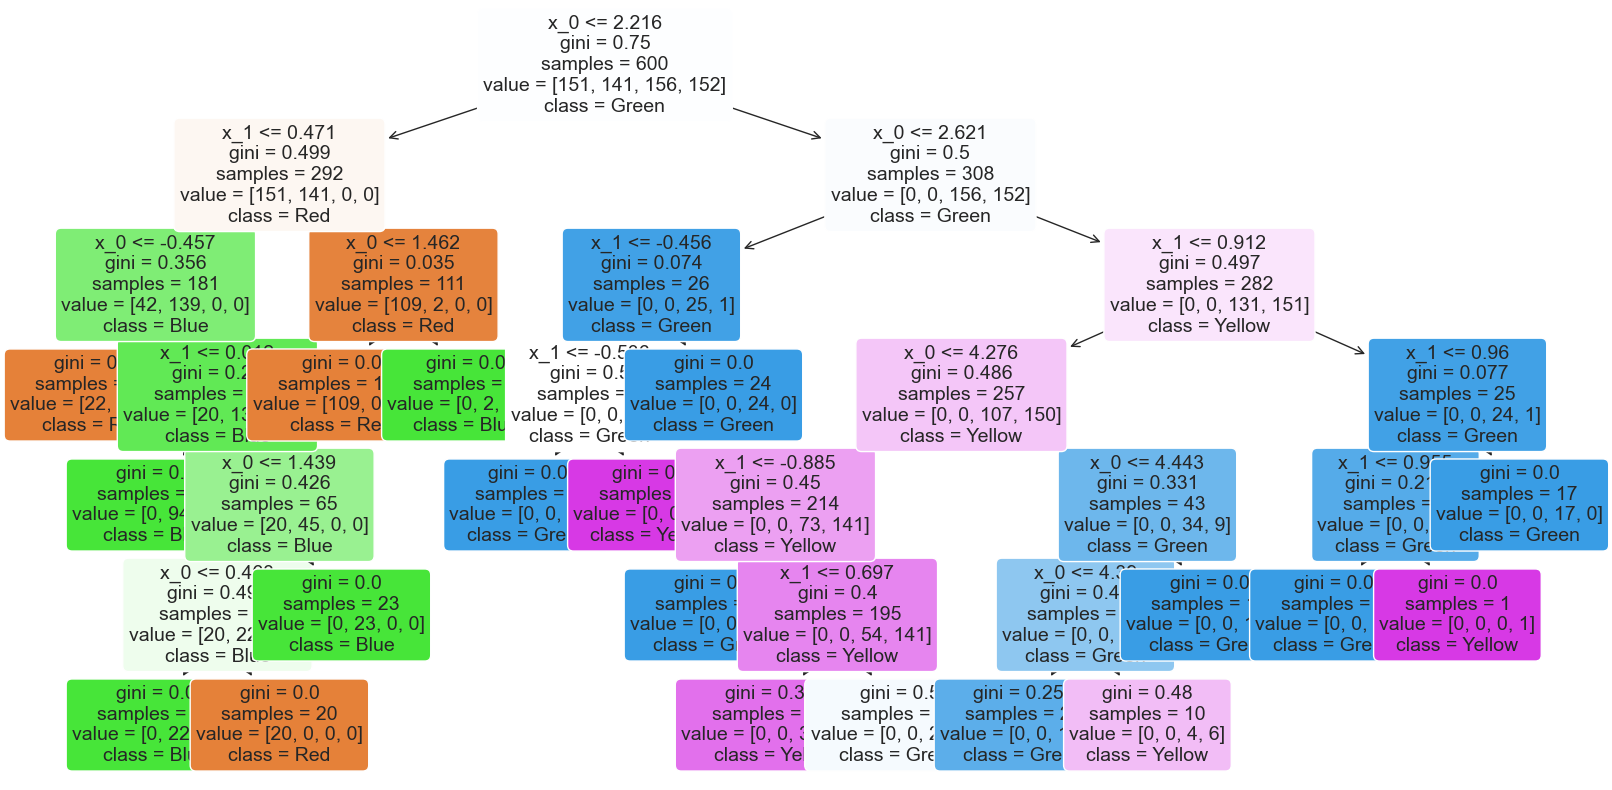

In [122]:
# Exporting the decision tree rules to text
tree_rules = export_text(decision_tree, feature_names=["x_0", "x_1"])
print(tree_rules, "\n")

# Plotting the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
a = plot_tree(decision_tree,
              feature_names=["x_0", "x_1"],
              class_names=["Red", "Blue", "Green", "Yellow"],  # Class names as colors
              rounded=True,
              filled=True, 
              fontsize=14)
plt.show()


c:\Users\aweso\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


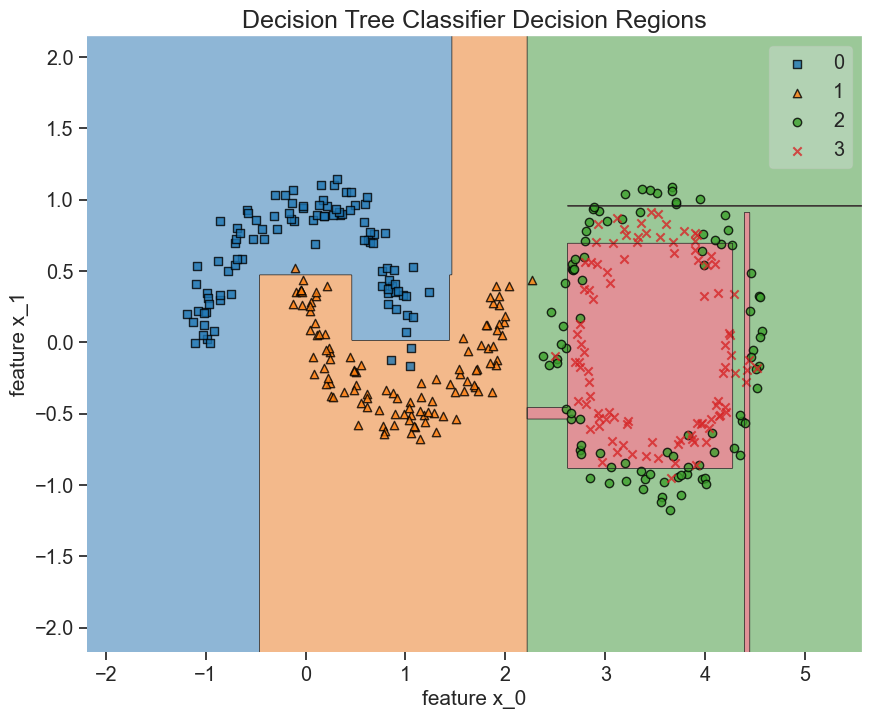

In [123]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("Decision Tree Classifier Decision Regions", fontsize=18)
plt.grid()
plt.show()

## Visualizing Decision Regions

After training the Decision Tree Classifier, we use the `plot_decision_regions` function to visualize how the model has partitioned the feature space. This visualization is crucial in understanding how the decision boundaries are drawn and how well they separate the different classes.

### Analysis of the Model's Performance

The result is quite remarkable. Despite some apparent errors, the visualization shows that the Decision Tree Classifier has done a commendable job in identifying all four classes. The distinct regions corresponding to each class are evident, though there are areas where the classes intermingle, leading to misclassifications.

This visual assessment provides an intuitive understanding of the model's strengths and weaknesses, highlighting areas where the classifier is confident and areas where it struggles to differentiate between classes.


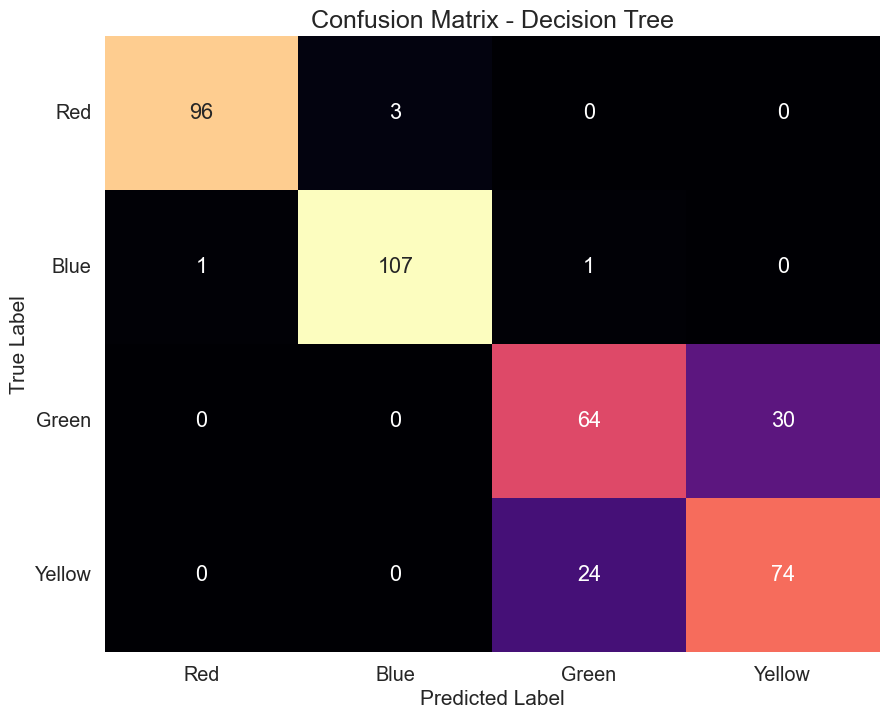

In [124]:
# Predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Generate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into DataFrame
matrix_df = pd.DataFrame(confusion_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df, 
            annot=True, 
            fmt="g", 
            ax=ax, 
            cmap="magma", 
            cbar=False)

# Setting the title and labels of the confusion matrix
ax.set_title("Confusion Matrix - Decision Tree", fontsize=18)
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Red", "Blue", "Green", "Yellow"]) 
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Red", "Blue", "Green", "Yellow"], rotation=0)
plt.show()


## Evaluating with a Confusion Matrix

To quantitatively assess the performance of our Decision Tree Classifier, we generate a confusion matrix. This matrix is a powerful tool for understanding not just the overall accuracy of the model, but also the specific types of errors it makes.

### Confusion Matrix Interpretation

The confusion matrix visually represents the model's predictions against the true labels. The cells along the diagonal (from top left to bottom right) show the number of correct predictions for each class, while the off-diagonal cells indicate misclassifications.

#### Key Observations:
- **Major Mismatches**: A notable observation is the significant number of mismatches between the green and yellow classes. This suggests that the model is particularly struggling to differentiate between these two classes.
- **Correct Matches**: The diagonal cells show a decent number of correct predictions, indicating that the model has a reasonable capability to identify the classes.

The matrix provides crucial insights into the model's behavior, highlighting specific areas where improvement is needed, particularly in distinguishing between certain classes.


In [125]:
y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        99
           1       0.97      0.98      0.98       109
           2       0.72      0.68      0.70        94
           3       0.71      0.76      0.73        98

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



The overall accuracy is great at 85%.

## Analyzing CO2 Emissions in Canada by Fuel Type

In our next phase, we explore the `CO2_Emissions_Canada.csv` dataset to understand the relationship between fuel types and CO2 emissions. This dataset contains information about various vehicles, including their fuel consumption and CO2 emissions.

### Data Preprocessing Steps

Before diving into the analysis, we perform several preprocessing steps to ensure data quality and relevance:

1. **Removing Duplicates**: To maintain data integrity, any duplicate records are removed from the dataset.
2. **Filtering Fuel Types**: We exclude certain fuel types, specifically 'N' and 'Z'.
3. **Balanced Sampling**: To avoid bias towards more common fuel types, we sample an equal number of instances (100) from each fuel type. This ensures a balanced representation of all types in our analysis.



In [126]:
fuel_df = pd.read_csv("Data/CO2_Emissions_Canada.csv")

# Remove duplicates from the dataset
fuel_df = fuel_df.drop_duplicates()

# Filter out the 'N' fuel type
fuel_df = fuel_df[fuel_df['Fuel Type'] != 'N']
fuel_df = fuel_df[fuel_df['Fuel Type'] != 'Z']

# Sample 100 instances from each fuel type
fuel_df = fuel_df.groupby('Fuel Type').sample(n=100, random_state=1)

# Count the number of instances of each fuel type
fuel_type_counts = fuel_df['Fuel Type'].value_counts()

# Display the counts
print(fuel_type_counts)

D    100
E    100
X    100
Name: Fuel Type, dtype: int64


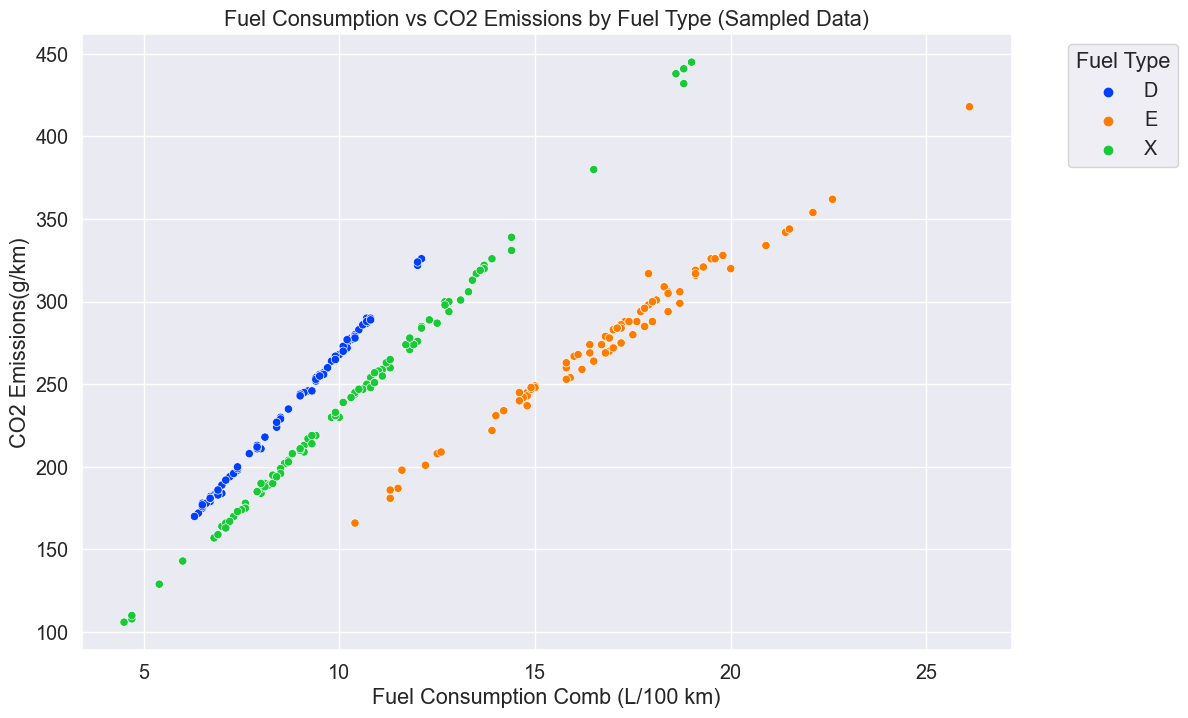

In [127]:
# Create a scatter plot for Fuel Consumption Comb vs CO2 Emissions, colored by Fuel Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuel_df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Fuel Consumption vs CO2 Emissions by Fuel Type (Sampled Data)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### Scatter Plot Analysis

The scatter plot above depicts 'Fuel Consumption Comb (L/100 km)' on the x-axis against 'CO2 Emissions(g/km)' on the y-axis. Each point represents a vehicle, colored according to its fuel type.

#### Key Observations:
- **Linear Relationships**: The plot reveals three distinct linear trends, suggesting a strong linear relationship between fuel consumption and CO2 emissions for different fuel types.
- **Fuel Type Differentiation**: The color-coding by fuel type allows us to observe how different types of fuel contribute to varying levels of emissions.

|--- Fuel Consumption Comb <= 13.80
|   |--- Fuel Consumption Comb <= 10.75
|   |   |--- CO2 Emissions <= 251.00
|   |   |   |--- Fuel Consumption Comb <= 7.45
|   |   |   |   |--- CO2 Emissions <= 174.00
|   |   |   |   |   |--- CO2 Emissions <= 169.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- CO2 Emissions >  169.50
|   |   |   |   |   |   |--- Fuel Consumption Comb <= 6.90
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fuel Consumption Comb >  6.90
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- CO2 Emissions >  174.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fuel Consumption Comb >  7.45
|   |   |   |   |--- CO2 Emissions <= 211.50
|   |   |   |   |   |--- CO2 Emissions <= 170.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- CO2 Emissions >  170.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- CO2 Emissions >  211.50
|   |   |   |   |   |--- Fuel Consumption Comb <= 9.25
|   |   |   

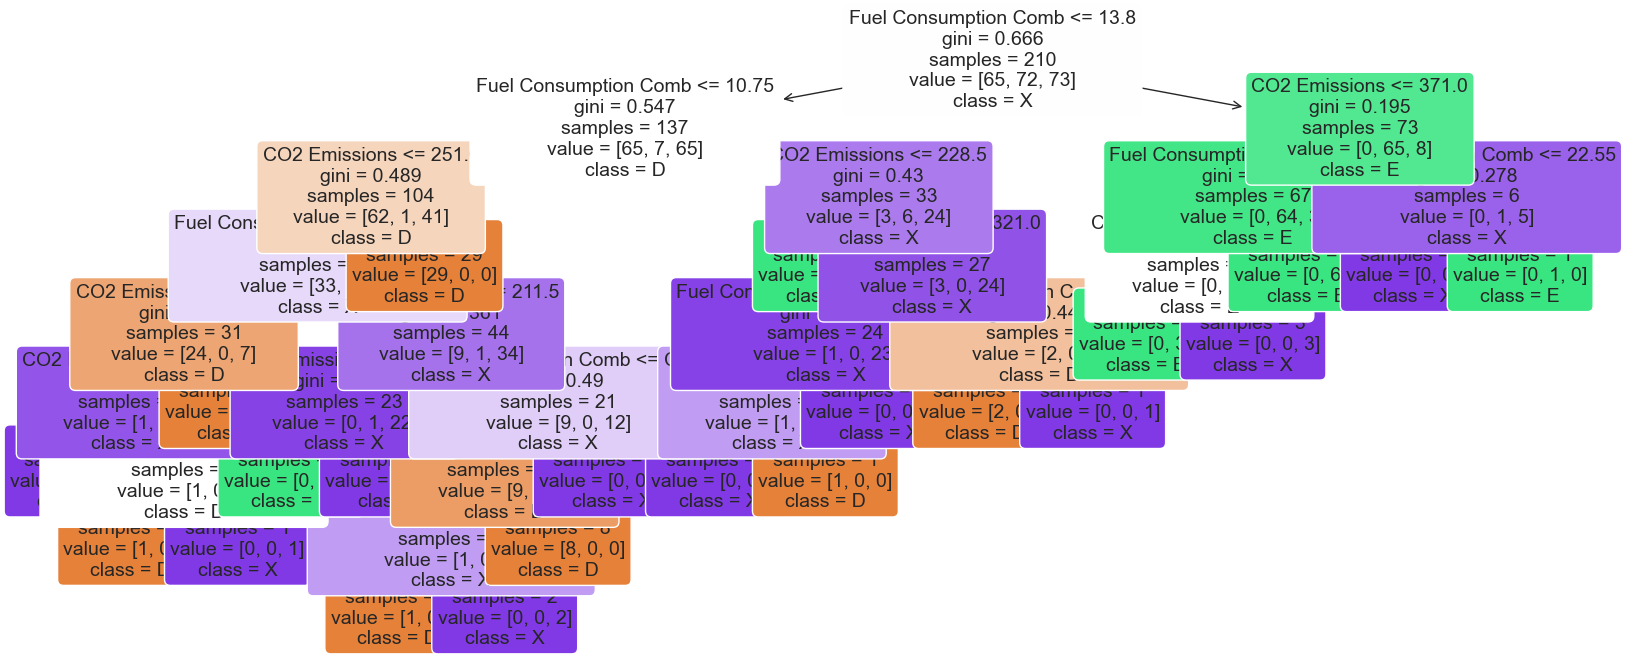

In [128]:
# Assuming fuel_df is already loaded and preprocessed
label_encoder = LabelEncoder()
fuel_df['Fuel Type'] = label_encoder.fit_transform(fuel_df['Fuel Type'])

# Preparing the data
X = fuel_df[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
y = fuel_df['Fuel Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the decision tree
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

# Exporting the decision tree rules to text
tree_rules = export_text(decision_tree, feature_names=["Fuel Consumption Comb", "CO2 Emissions"])
print(tree_rules, "\n")

# Plotting the decision tree
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
              feature_names=["Fuel Consumption Comb", "CO2 Emissions"],
              class_names=label_encoder.classes_,
              rounded=True,
              filled=True, 
              fontsize=14)
plt.show()



c:\Users\aweso\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


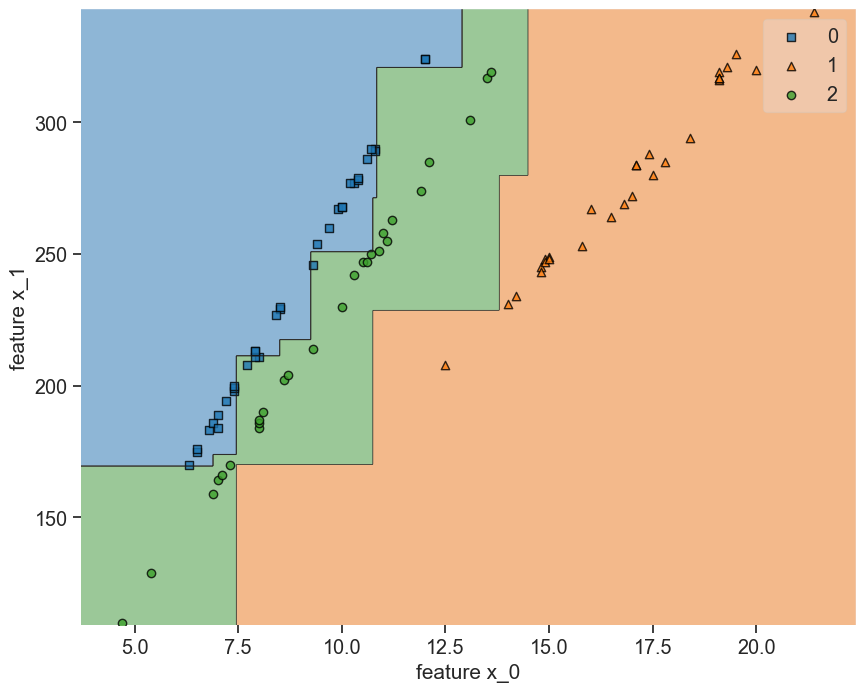

In [130]:
from mlxtend.plotting import plot_decision_regions

# Convert X_test and y_test to numpy arrays
X_test_np = X_test.values
y_test_np = y_test.values

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test_np, y_test_np, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

#### Analysis
- **Performance**: The Decision Tree shows an interesting but imperfect ability to classify the data. Given the linear nature and distinct groupings of the data, the decision tree faces challenges in perfectly matching the regions.
- **Model Limitations**: This highlights a limitation of decision trees when dealing with linearly separable data that forms narrow and elongated clusters. The tree's inherent structure might not be ideal for capturing such patterns.

Despite its limitations, the decision tree does a good job distinguishing broader patterns within the data.


### Setting Up for Regression Tree Analysis

We continue with the `CO2_Emissions_Canada.csv` dataset, but this time, we'll use a Regression Tree to predict the fuel type based on 'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions(g/km)'. This approach differs from the previous classification task, offering a new perspective on the data.

#### Preparing the Data
We extract the necessary features and the target variable, preparing them for the regression model:

- Features: 'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions(g/km)'
- Target: 'Fuel Type'

#### Data Shapes
The shapes of our feature matrix `X` and target vector `y` are checked to ensure they are aligned for model training.

#### Training the Regression Tree
- We instantiate a `DecisionTreeRegressor` with a `max_depth` of 3, aiming to balance model complexity and overfitting risk.
- The dataset is split into training and test sets, ensuring a fair evaluation of the model.
- The Regression Tree is then fitted on the training data, ready to be evaluated on its predictive performance.


In [146]:
X = fuel_df[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].values
y = fuel_df['Fuel Type'].values

X.shape
y.shape

(300,)

In [148]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [164]:
# Create empty lists to store max_depth and MSE values
max_depth_values = []
mse_values = []

# Repeat the process 10 times with different max_depth values
for max_depth in range(1, 11):
    reg = DecisionTreeRegressor(max_depth=max_depth, random_state=12)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Append max_depth and MSE values to the respective lists
    max_depth_values.append(max_depth)
    mse_values.append(mse)


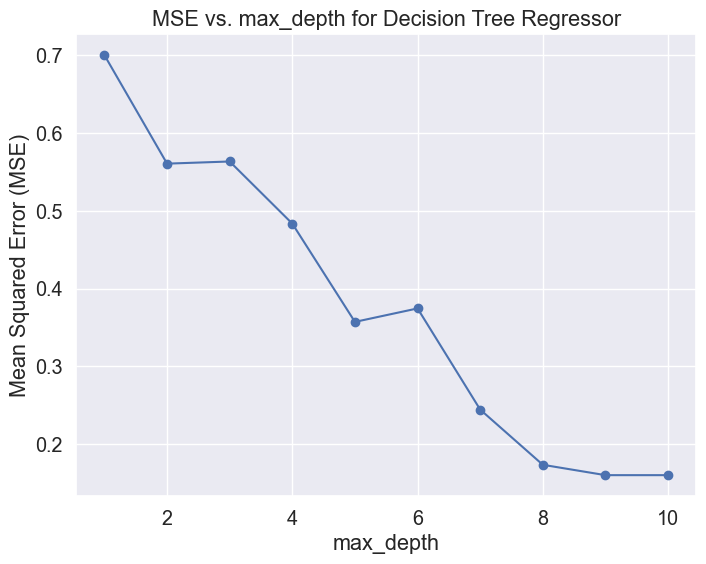

In [165]:
# Plot the MSE versus max_depth
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. max_depth for Decision Tree Regressor')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

## Tuning the Max Depth of the Regression Tree

An essential aspect of modeling with Decision Trees is determining the optimal `max_depth` - a hyperparameter that controls the depth of the tree. The right depth can significantly influence the model's ability to generalize and its overall performance.

### Experimenting with Different Max Depth Values

To find the most effective `max_depth` for our Regression Tree, we conduct an experiment by varying this parameter from 1 to 10. For each value of `max_depth`, we:
- Train the Regression Tree on the training set.
- Predict on the test set.
- Calculate and record the Mean Squared Error (MSE) between the predictions and the actual values.

### Visualizing MSE vs. Max Depth

We plot the MSE against each `max_depth` to visually assess which depth provides the lowest error, indicating the best performance.

#### Observations:
- The plot shows a trend of decreasing MSE as the `max_depth` increases, with the lowest MSE observed around a `max_depth` of 8.
- This suggests that a deeper tree is more effective for this particular dataset, capturing more complexities and nuances in the data.

However, it's crucial to balance depth with the risk of overfitting. A depth that minimizes MSE while avoiding overfitting would be ideal for our model.
